## PROJECT START

## IMPORTING LIBRARIES

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
print("ALL LIBRARIES UPLOADED IN PROJECT")

ALL LIBRARIES UPLOADED IN PROJECT


## OPENING THE FILES 

In [16]:
intake = pd.read_csv('DataSet_Animal_Center_Intakes.csv')
outcome = pd.read_csv('DataSet_Animal_Center_Outcomes.csv')
print(" ALL DATA LOADED IN PROJECT ")

 ALL DATA LOADED IN PROJECT 


# #Project Task-01: Print the shape of the dataset


In [17]:
outcome.shape

(124491, 12)

In [18]:
intake.shape


(124120, 12)

#### REMARK      Shape of intake file = (124120, 12)   Shape of Outcome file = (124491, 12)

# Project Task-02: Which column has null values?

In [19]:
null_columns = intake.isnull().any()
columns_with_null = null_columns[null_columns].index.tolist()

print("Columns with null values:")
print(columns_with_null)

Columns with null values:
['Name', 'Sex upon Intake']


 #### REMARK   1) Columns with null values(INTAKE FILE) : ['Name', 'Sex upon Intake']

In [21]:
null_columns = outcome.isnull().any()
columns_with_null = null_columns[null_columns].index.tolist()

print("Columns with null values:")
print(columns_with_null)

Columns with null values:
['Name', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome']


##### REMARK 2)Columns with null values(OUTCOME FILE) : ['Name', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome']

## Project Task-03: Remove the duplicate rows from intake dataset.

In [22]:
intake_without_duplicates = intake.drop_duplicates()

print("Shape before removing duplicates:", intake.shape)
print("Shape after removing duplicates:", intake_without_duplicates.shape)

Shape before removing duplicates: (124120, 12)
Shape after removing duplicates: (124101, 12)


#### REMARK    Shape before removing duplicates: (124120, 12)              Shape after removing duplicates: (124101, 12)

## Project Task-04: Rename to column names as follows:-
#### 1) 'Old Column Name' = 'New Column Name'
#### 2) 'Animal ID' = 'id',
#### 3) 'DateTime' = 'date_time',
#### 4) 'MonthYear' = 'month_year',
#### 5) 'Found Location' = 'found_location',
#### 6) 'Intake Type' = 'intake_type',
#### 7) 'Intake Condition' = 'intake_condition',
#### 8) 'Animal Type' = 'animal_type',
#### 9) 'Sex upon Intake' = 'sex_upon_intake',
#### 10) 'Age upon Intake' = 'age_upon_intake',
#### 11) 'Breed' = 'breed' 

In [24]:
column_mapping = {
    'Old Column Name' : 'New Column Name',
    'Animal ID': 'id',
    'DateTime': 'date_time',
    'MonthYear': 'month_year',
    'Found Location': 'found_location',
    'Intake Type': 'intake_type',
    'Intake Condition': 'intake_condition',
    'Animal Type': 'animal_type',
    'Sex upon Intake': 'sex_upon_intake',
    'Age upon Intake': 'age_upon_intake',
    'Breed': 'breed'
}


intake.rename(columns=column_mapping, inplace=True)


print(intake.columns)


Index(['id', 'Name', 'date_time', 'month_year', 'found_location',
       'intake_type', 'intake_condition', 'animal_type', 'sex_upon_intake',
       'age_upon_intake', 'breed', 'Color'],
      dtype='object')


#### REMARK   The Updated Column Names == Index(['id',  'Name',  'date_time',  'month_year',  'found_location',
####  'intake_type',  'intake_condition',  'animal_type',  'sex_upon_intake', 'age_upon_intake', 'breed', 'Color'],      dtype='object')

## Project Task-05: Remove Monthyear column because it is similar to Datetime column.

In [25]:
intake = intake.drop(['month_year'],axis=1)
intake.head()

,id,Name,date_time,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


#### Remarks: The Output shows the data without the column 'month_year'.

## Project Task-06: Extracting month and year from Datetime column

In [25]:
intake['date_time'] = pd.to_datetime(intake['date_time'])

intake['intake_month'] = intake['date_time'].dt.month
intake['intake_year'] = intake['date_time'].dt.year


intake_sorted = intake.sort_values(by='date_time')
display(intake_sorted)


,id,Name,date_time,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,Color,intake_month,intake_year
67277,A521520,Nina,2013-10-01 07:51:00,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan,10,2013
35928,A664235,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,10,2013
2186,A664237,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,10,2013
106832,A664236,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,10,2013
108439,A664233,Stevie,2013-10-01 08:53:00,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White,10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124117,A830180,Gigi,2021-03-03 16:31:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,9 years,Australian Cattle Dog/Belgian Malinois,Brown Brindle/White,3,2021
124119,A830181,Nona,2021-03-03 16:31:00,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,4 years,Domestic Shorthair Mix,White/Black,3,2021
124110,A830172,Sully,2021-03-03 16:50:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,2 years,Rottweiler/Great Dane,Black/Tan,3,2021
124116,A830183,NaN,2021-03-03 17:12:00,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White,3,2021


#### REMARK  The last 2 columns contains the particular month and year fetched from date_time column

## Project Task-07

### 1)  Which month,year has most animal intakes ?


In [26]:
monthly_counts = intake.groupby(['intake_year', 'intake_month']).size().reset_index(name='intake_count')
most_intakes = monthly_counts.loc[monthly_counts['intake_count'].idxmax()]

print("Month-Year with the most animal intakes:")
print("Month:", most_intakes['intake_month'])
print("Year:", most_intakes['intake_year'])


Month-Year with the most animal intakes:
Month: 6
Year: 2015


#### REMARK     Month-Year with the most animal intakes(according to the data)   :   Month: 6    Year: 2015

###  2) Draw a pie chart representing year wise animal intake from year 2014 to 2021.

Number of intakes year-wise:
2014    18656
2015    18712
2016    17675
2017    17563
2018    16979
2019    19728
2020     9586
2021     1039
Name: intake_year, dtype: int64


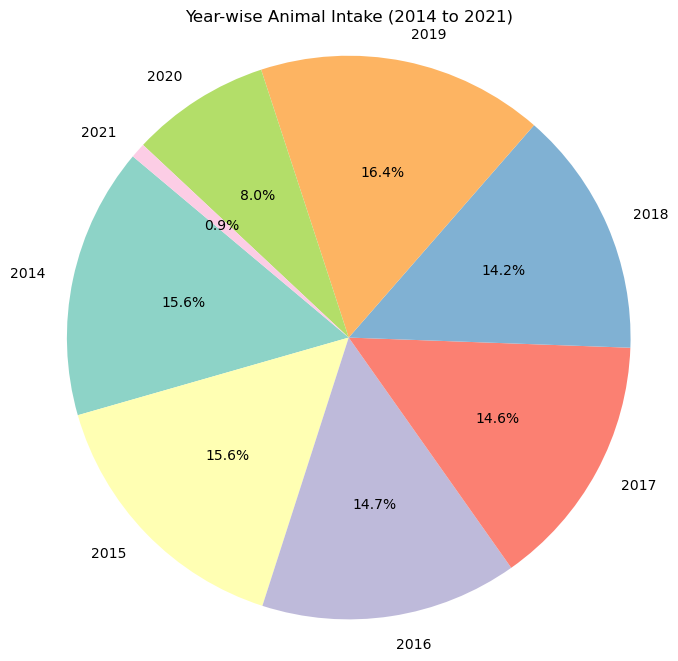

In [35]:
intake['date_time'] = pd.to_datetime(intake['date_time'])


intake['intake_year'] = intake['date_time'].dt.year


intake_years = intake[(intake['intake_year'] >= 2014) & (intake['intake_year'] <= 2021)]


yearly_counts = intake_years['intake_year'].value_counts().sort_index()
print("Number of intakes year-wise:")
print(yearly_counts)

plt.figure(figsize=(8, 8))
plt.pie(yearly_counts, labels=yearly_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Year-wise Animal Intake (2014 to 2021)')
plt.axis('equal')
plt.show()

#### REMARK The output shows that "The month and year with the most animal intakes is: 6/2015(i.e., 18712) and there is a pie chart for the same.

## Project Task-08: 1)Create a bar chart to represent month wise animal intake.
##  2) Which month has highest animal intake?

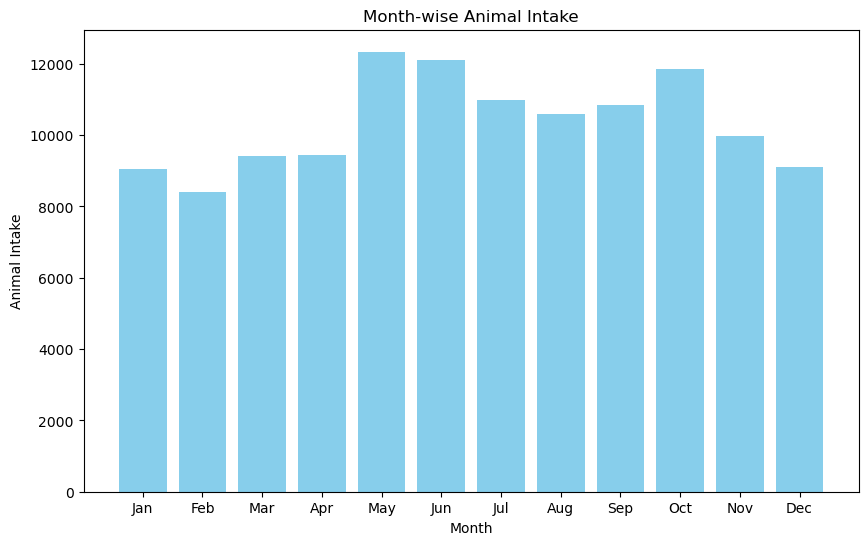

Month with the highest animal intake: 5 - May


In [35]:
monthly_counts = intake['intake_month'].value_counts().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue')
plt.xticks(range(1, 13), month_names)
plt.xlabel('Month')
plt.ylabel('Animal Intake')
plt.title('Month-wise Animal Intake')
plt.show()

highest_month = monthly_counts.idxmax()
highest_month_name = month_names[highest_month - 1]
print("Month with the highest animal intake:", highest_month, "-", highest_month_name)

####  REMARK  We can conclude from the Bar Chart that the 5th month(MAY) has the highest animal intake above 12000

## Project Task-09: 1)Create a bar chart to represent animal intake methods wise counting.
##                              2)What are the animal intake methods ? Print their names?

Animal Intake Methods:
Stray
Owner Surrender
Public Assist
Wildlife
Abandoned
Euthanasia Request


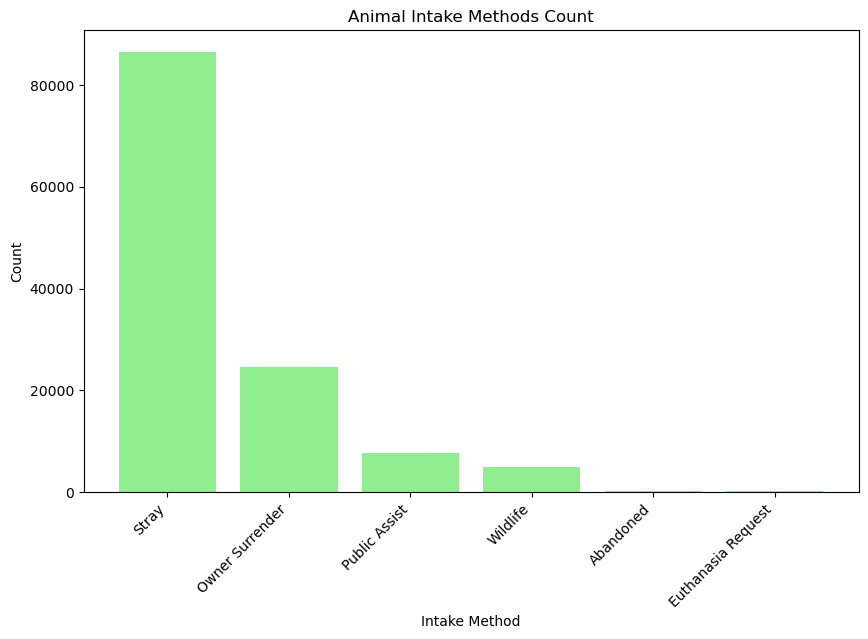

In [45]:
intake_methods_counts = intake['intake_type'].value_counts()


animal_intake_methods = intake_methods_counts.index.tolist()
print("Animal Intake Methods:")
for method in animal_intake_methods:
    print(method)
    
    
    
plt.figure(figsize=(10, 6))
plt.bar(intake_methods_counts.index, intake_methods_counts.values, color='lightgreen')
plt.xlabel('Intake Method')
plt.ylabel('Count')
plt.title('Animal Intake Methods Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Remarks: The Output shows the Animal Intake methods and thier count with the Bar Chart as well. 

## Project Task-10: What are the conditions of animals which are taken into the shelter?

In [37]:
animal_conditions = intake['intake_condition'].unique()


print("Conditions of animals taken into the shelter:")
for condition in animal_conditions:
    print(condition)

Conditions of animals taken into the shelter:
Normal
Sick
Injured
Nursing
Aged
Other
Feral
Medical
Pregnant
Behavior


####  REMARK  The output shows the different conditions in which animal were taken into shelter. 

## Project Task-11: How many types of animals are taken into shelter and what is their total count?

In [38]:
animal_type_counts = intake['animal_type'].value_counts()


total_animals_count = len(intake)

num_animal_types = len(animal_type_counts)


print("Number of types of animals taken into the shelter:", num_animal_types)
print("Total count of animals taken into the shelter:", total_animals_count)


print("\nCount of each animal type:")
for animal_type, count in animal_type_counts.items():
    print(f"{animal_type}: {count}")

Number of types of animals taken into the shelter: 5
Total count of animals taken into the shelter: 124120

Count of each animal type:
Dog: 70447
Cat: 46455
Other: 6610
Bird: 586
Livestock: 22


####  REMARK   1)Number of types of animals taken into the shelter: 5
####                     2)Total count of animals taken into the shelter: 124120

## Project Task-12:   1) What are the top 10 breeds in the animal shelter?
## 2) Draw a breed wise bar plot.

Australian Cattle Dog Mix     1511
Bat Mix                       1756
Chihuahua Shorthair Mix       6238
Domestic Longhair Mix         1540
Domestic Medium Hair Mix      3115
Domestic Shorthair            7006
Domestic Shorthair Mix       30985
German Shepherd Mix           3003
Labrador Retriever Mix        6861
Pit Bull Mix                  8407
Name: breed, dtype: int64


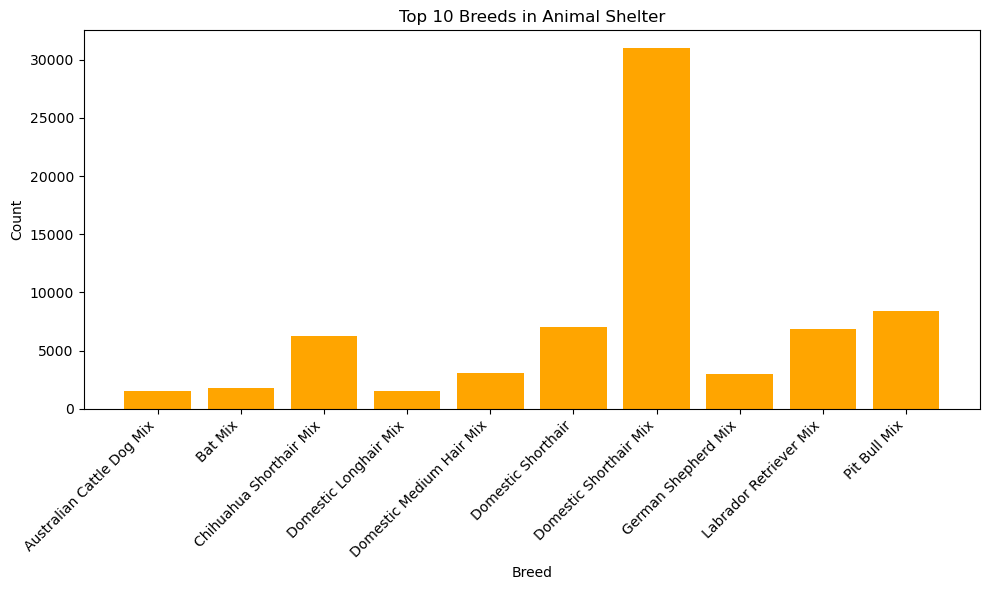

In [43]:
breed_counts = intake['breed'].value_counts()


top_10_breeds = breed_counts.head(10).sort_index()

print( top_10_breeds )


plt.figure(figsize=(10, 6))
plt.bar(top_10_breeds.index, top_10_breeds.values, color='orange')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Top 10 Breeds in Animal Shelter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### REMARK The Output shows the Bar Chart Representation of different Breed but the Top10.


## Project Task-13: 1) What are top 20 common names of animals in animal shelter?
##  2) Draw a bar char reprsenting name wise count of the animals.

Bear        202
Bella       523
Blue        304
Buddy       320
Charlie     326
Coco        324
Cookie      204
Daisy       365
Jack        203
Lola        270
Lucky       200
Lucy        312
Luna        494
Max         564
Oreo        205
Princess    333
Rocky       383
Sadie       202
Shadow      204
Zeus        227
Name: Name, dtype: int64


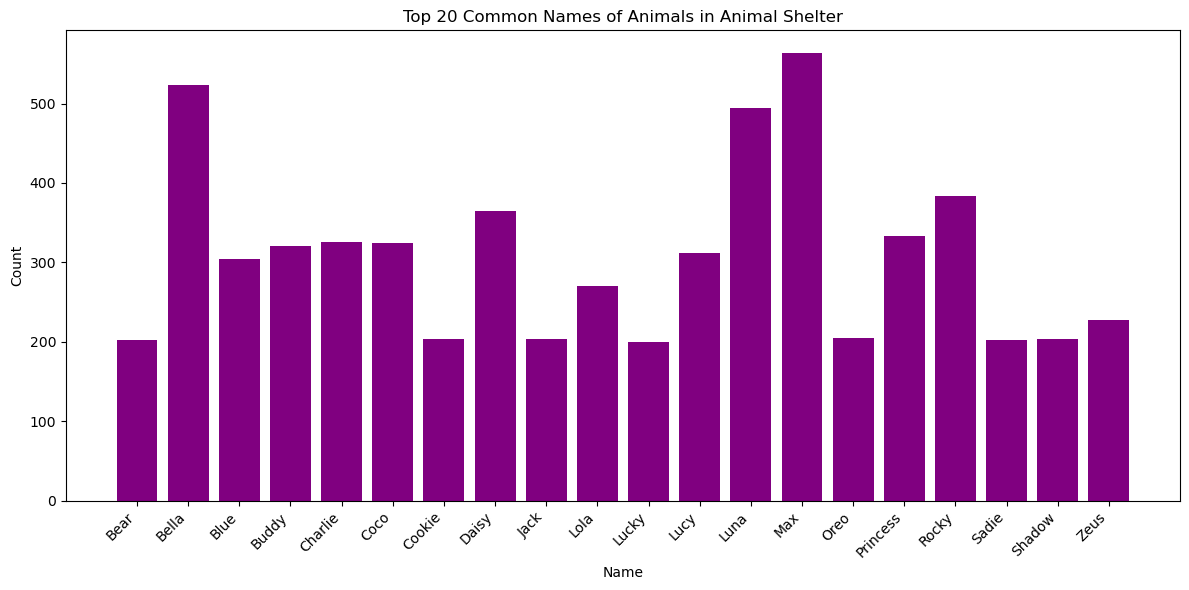

In [42]:
name_counts = intake['Name'].value_counts()


top_20_names = name_counts.head(20).sort_index()
print( top_20_names )


plt.figure(figsize=(12, 6))
plt.bar(top_20_names.index, top_20_names.values, color='purple')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 20 Common Names of Animals in Animal Shelter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Remarks: The Output shows the Bar Chart of Top 20 Common Names

##  Project Task-14: Draw a bar char representing the "Outcome Type" wise count of animals using the dataset of Animal_Center_Outcomes.csv. 

Adoption           55347
Died                1156
Disposal             568
Euthanasia          8381
Missing               69
Relocate              22
Return to Owner    21517
Rto-Adopt            698
Transfer           36713
Name: Outcome Type, dtype: int64


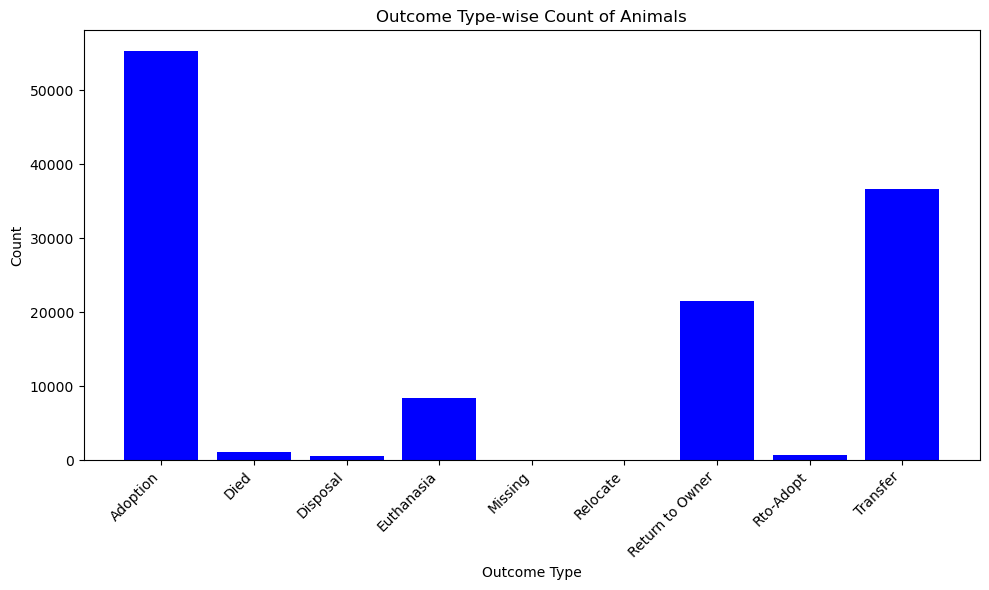

In [48]:
outcome_counts = outcome['Outcome Type'].value_counts().sort_index()

print( outcome_counts )



plt.figure(figsize=(10, 6))
plt.bar(outcome_counts.index, outcome_counts.values, color='blue')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.title('Outcome Type-wise Count of Animals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()









#### REMARK This shows what was the outcome of the animals that were in the Animal Center with the help of Bar Chart.

####   END 

#### PROJECT BY ANANAY RAMPAL